# Database Exploration

By **Franklin Oliveira**

-----
This notebook contains some code written in order for me (Franklin) to get accquainted with the `crustacea` database. Here you'll find some basic data treatment and some insights that did show up as I started to understand all the information on file <font color='blue'>'Planilha geral Atualizda FINAL com correções.xlsx'</font>.

In [1]:
import datetime
import numpy as np
import pandas as pd
from collections import defaultdict

# pacotes para visualização rápida
import seaborn as sns
import matplotlib.pyplot as plt

# Waffle Charts
from pywaffle import Waffle 
# docs: https://pywaffle.readthedocs.io/en/latest/examples/block_shape_distance_location_and_direction.html

# pacote para visualização principal
import altair as alt

# habilitando renderizador para notebook
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Importing data...

In [65]:
excel = pd.ExcelFile('Planilha geral Atualizda FINAL com correções.xlsx')
sheet_name = excel.sheet_names

print('The excel file contains the following sheets:', sheet_name)
print('\nDatabase is in sheet:', sheet_name[0])

The excel file contains the following sheets: ['Banco de Dados Colecao Carcinol', 'Planilha1']

Database is in sheet: Banco de Dados Colecao Carcinol


In [66]:
# db = excel.parse(sheet_name[0], sep=';', encoding='utf-8-sig')
db = pd.read_csv('db.csv', sep=',', encoding='utf-8-sig', low_memory=False)
print(f'The database has {db.shape[0]} rows and {db.shape[1]} columns.')

The database has 28689 rows and 132 columns.


In [73]:
db['Species Author1']

0                 Burkenroad, 1936
1                 Burkenroad, 1936
2                 Burkenroad, 1936
3                  Hobbs III, 1979
4                 Burkenroad, 1936
                   ...            
28684             Rafinesque, 1815
28685             Rafinesque, 1815
28686             Rafinesque, 1815
28687             Rafinesque, 1815
28688    Rodrigues & Cardoso, 2018
Name: Species Author1, Length: 28689, dtype: object

<br>

**<font color='red' size='5'>Colunas de Nome </font>**

`Determiner First Name1` e `Determiner Last Name1`

In [74]:
db['Determiner First Name1']

0                  Alceu
1                  Alceu
2                  Alceu
3        Maria Margarida
4                  Alceu
              ...       
28684             Ayrton
28685             Ayrton
28686             Ayrton
28687             Ayrton
28688            Thaiana
Name: Determiner First Name1, Length: 28689, dtype: object

In [5]:
# for col in db.columns:
#     print('-', col)

#### removing '\n' from column names

In [6]:
db.columns = [str(col).replace(r'\n','') for col in db.columns]

#### closer look on some columns...

In [8]:
# db[['Species1', 'Species Author1', 'Type Status1', 'Qualifier1', 'Determiner First Name1',
#       'Determiner Middle1', 'Determiner Last Name1', 'Determined Date1']]

## preparing data for charts...

Column: `Type Status1`

In [9]:
crustaceas = db.copy()

In [10]:
crustaceas['Type Status1'].value_counts()

Paratipo         433
Holotipo         203
ParaTIPO         142
PARATIPO         120
HOLOTIPO          82
Alotipo           69
ALOTIPO           12
Topotipo           6
Sintipo            5
Neotipo            5
Paralectotipo      4
Lectotipo          4
TOPOTIPO           3
MATERIAL TIPO      2
Tipo               2
PARALECTOTIPO      2
NEOTIPO            1
Material Tipo      1
Co-tipo            1
Name: Type Status1, dtype: int64

Let's begin cleaning this data and lowering all cases.

In [11]:
crustaceas['Type Status1'] = crustaceas['Type Status1'].str.strip().str.lower().str.capitalize()

In [12]:
crustaceas['Type Status1'].value_counts()

Paratipo         695
Holotipo         285
Alotipo           81
Topotipo           9
Neotipo            6
Paralectotipo      6
Sintipo            5
Lectotipo          4
Material tipo      3
Tipo               2
Co-tipo            1
Name: Type Status1, dtype: int64

### Collecting date (year), class and kingdom 

Columns: `Cataloged Date` - `Class1` - `Kingdom`

In [15]:
Table = crustaceas[['Cataloged Date','Class1','Kingdom', 'Species1', 'Type Status1']].copy()

d = []
counter=0
for row in Table['Cataloged Date']:
    if not str(row).find('/')==-1:
        dates_values = str(row).split("/")
        year = int(dates_values[0])
        month = int(dates_values[1])
        if (month>1) and (month<12):
            #store the year and month in a datetime datatype for later sorting
            dateRecord = datetime.datetime(year,month,1)    
            
    d.append({'year':year, 'class':Table.loc[counter,'Class1'],
              'kingdom':Table.loc[counter,'Kingdom'], 'species':Table.loc[counter,'Species1'],
              'type_status':Table.loc[counter,'Type Status1']
             })
    counter = counter+1
    
NewTable = pd.DataFrame(d)
NewTable.head()

,year,class,kingdom,species,type_status
0,1980,Malacostraca,Animalia,schmitti,NaN
1,1980,Malacostraca,Animalia,schmitti,NaN
2,1980,Malacostraca,Animalia,schmitti,NaN
3,1980,Malacostraca,Animalia,schmitti,NaN
4,1980,Malacostraca,Animalia,schmitti,NaN


### counting number of registers per year

In [19]:
classes = NewTable_Date['class'].unique()
classes

e = []
countam = 0
for classSp in classes:
    p = NewTable.loc[NewTable.loc[:,'class']==classSp,:]
#     p.year.value_counts()
#     print(p['class'])
    numbers = p.year.value_counts(sort=False)
#     print(p.year.value_counts(sort=False))
    for oneyear in p.year.unique():
        countam = countam + numbers.loc[oneyear]
        
        # problema: pega só a primeira informação de cada ano
        e.append({'class':p['class'].unique()[0],'kingdom':p.kingdom.unique()[0],
                  'year':oneyear,'amount':numbers.loc[oneyear], 
                 'species':p.species.unique()[0], 'type_status':p.type_status.unique()[0]})
NewTable_Years = pd.DataFrame(e)
NewTable_Years

,class,kingdom,year,amount,species,type_status
0,Malacostraca,Animalia,1980,52,schmitti,NaN
1,Malacostraca,Animalia,2009,288,schmitti,NaN
2,Malacostraca,Animalia,1981,118,schmitti,NaN
3,Malacostraca,Animalia,1985,75,schmitti,NaN
4,Malacostraca,Animalia,1982,112,schmitti,NaN
...,...,...,...,...,...,...
196,Phyllocarida,Animalia,2004,1,sp,NaN
197,Phyllocarida,Animalia,2006,1,sp,NaN
198,Indeterminado,Animalia,2015,8,sp.,NaN
199,Indeterminado,Animalia,2017,1,sp.,NaN


<font color='red' size='5'>Fazer gráfico dos holótipos por biólogo, ao longo do tempo </font>

<br>

<font color='red' size='5'>Fazer gráfico dos holótipos por biólogo, com ordens no eixo x </font>

Nome dos biólogos no eixo y, coluna Species1 no eixo x, cor: type status1, tamanho: número de registros.

### creating column `year` in crustaceas

In [14]:
def catch_year(row):
    if not str(row).find('/')==-1:
        dates_values = str(row).split("/")
        year = int(dates_values[0])
        month = int(dates_values[1])
        return year
    else:
        return np.NaN

In [69]:
crustaceas['year'] = crustaceas['Cataloged Date'].apply(catch_year)

### preparing taxonomy columns

`Kingdom` - `Phylum1` - `Subphylum1` - `Class1` - `Subclass1` - `Infraclass1` - `Superorder1` - `Order1` - `Suborder1` - `Infraorder1` - `Superfamily1` - `Family1` - `Subfamily1` - `Tribe1` - `Genus1` - `Species1`

In [16]:
taxon_columns = crustaceas.columns[21:37]

In [17]:
def treat_str(x):
    return str(x).lower().capitalize().strip()

In [18]:
for col in taxon_columns:
    print(f'Adjusting column {col}')
    crustaceas[col] = crustaceas[col].apply(treat_str)

Adjusting column Kingdom
Adjusting column Phylum1
Adjusting column Subphylum1
Adjusting column Class1
Adjusting column Subclass1
Adjusting column Infraclass1
Adjusting column Superorder1
Adjusting column Order1
Adjusting column Suborder1
Adjusting column Infraorder1
Adjusting column Superfamily1
Adjusting column Family1
Adjusting column Subfamily1
Adjusting column Tribe1
Adjusting column Genus1
Adjusting column Species1


### treating cataloger's name 

In this step, we're going to put together cataloger's first and last name. 

`Cataloger First Name` + `Cataloger Last Name`

In [25]:
crustaceas['Cataloger First Name'].astype(str) + ' ' + crustaceas['Cataloger Last Name'].astype(str)

0                      nan Legado
1                      nan Legado
2                      nan Legado
3                      nan Legado
4                      nan Legado
                   ...           
28684    Barbara Cristina Calcado
28685    Barbara Cristina Calcado
28686    Barbara Cristina Calcado
28687    Barbara Cristina Calcado
28688                     nan nan
Length: 28689, dtype: object

Just concatenating those two columns is not satisfactory because there's some dirt in these data columns. So, let's begin by treating them...

In [42]:
crustaceas['Cataloger First Name'] = crustaceas['Cataloger First Name'].fillna('').str.strip().apply(lambda x:str(x).split(' ')[0])
crustaceas['Cataloger Last Name'] = crustaceas['Cataloger Last Name'].fillna('').str.strip().apply(lambda x:str(x).split(' ')[-1])

In [44]:
crustaceas['Cataloger First_and_Last Name'] = crustaceas['Cataloger First Name'].astype(str) + ' ' + crustaceas['Cataloger Last Name'].astype(str)

In [46]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [55]:
db['Cataloger First Name'].value_counts()

Barbara Cristina    13
Name: Cataloger First Name, dtype: int64

In [53]:
crustaceas['Catalog'].value_counts()

 Legado            25629
                    3047
Barbara Calcado       13
Name: Cataloger First_and_Last Name, dtype: int64

In [63]:
crustaceas['Species1']

0         Schmitti
1         Schmitti
2         Schmitti
3         Schmitti
4         Schmitti
           ...    
28684     Serejoae
28685     Serejoae
28686     Serejoae
28687     Serejoae
28688    Ostrovski
Name: Species1, Length: 28689, dtype: object

In [87]:
teste = crustaceas['Cataloged Date'].value_counts()

In [88]:
teste = teste.reset_index().rename(columns={'index':'year', 'Cataloged Date':'counts'})

In [94]:
NewTable_Years

,class,kingdom,year,amount
0,Malacostraca,Animalia,1980,52
1,Malacostraca,Animalia,2009,288
2,Malacostraca,Animalia,1981,118
3,Malacostraca,Animalia,1985,75
4,Malacostraca,Animalia,1982,112
...,...,...,...,...
196,Phyllocarida,Animalia,2004,1
197,Phyllocarida,Animalia,2006,1
198,Indeterminado,Animalia,2015,8
199,Indeterminado,Animalia,2017,1


In [90]:
teste

,year,counts
0,1997.0,3316
1,1994.0,2267
2,2016.0,2110
3,2006.0,2075
4,1995.0,1531
...,...,...
82,1932.0,1
83,1957.0,1
84,1946.0,1
85,1961.0,1


In [98]:
# min e max para eixo X (year)
min_x = teste['year'].min()
max_x = teste['year'].max()

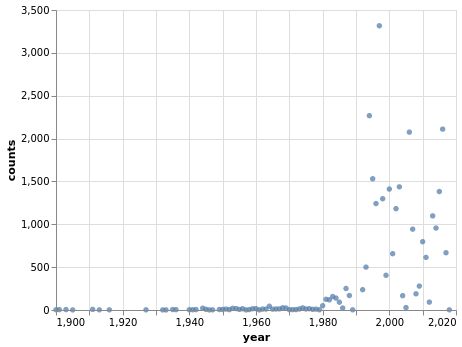

In [100]:
alt.Chart(data= teste).mark_circle().encode(
    x= alt.X('year', type='quantitative', scale=alt.Scale(domain=[min_x, max_x])),
    y= alt.Y('counts', type='quantitative')
)

In [106]:
teste = crustaceas['Species1'].value_counts().reset_index()

In [20]:
NewTable_Years.head()

,class,kingdom,year,amount,species,type_status
0,Malacostraca,Animalia,1980,52,schmitti,NaN
1,Malacostraca,Animalia,2009,288,schmitti,NaN
2,Malacostraca,Animalia,1981,118,schmitti,NaN
3,Malacostraca,Animalia,1985,75,schmitti,NaN
4,Malacostraca,Animalia,1982,112,schmitti,NaN


x: Species1, cor: Type Status1, size: counts

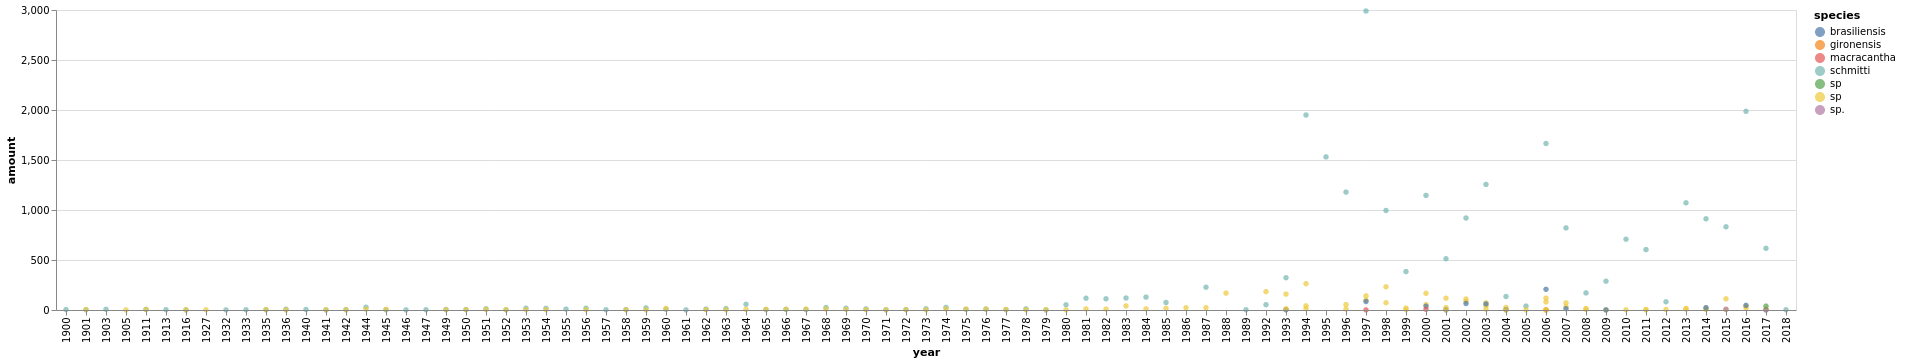

In [21]:
alt.Chart(NewTable_Years).mark_circle().encode(
    x= alt.X('year', type='ordinal'),
    y= alt.Y('amount', type='quantitative'),
    color=alt.Color('species')
)

## Waffle Chart

In [2]:
ex = pd.ExcelFile('Dados gerais de coleção MN_29_09_19 enviado KELLNER_Asla.xlsx')
print(ex.sheet_names)

['Dados Gerais', 'Dados por coleção']


In [3]:
dados_gerais = ex.parse('Dados Gerais', sep=';', encoding='utf-8-sig')
dados_colecao = ex.parse('Dados por coleção', sep=';', encoding='utf-8-sig')

In [4]:
dados_colecao.head(1)

,Unnamed: 0,Coleção,Curador,número de exemplares tombados e backlog,sub-coleções,Material afetado no incêndio (N),Material afetado no incêndio (% do total),Unnamed: 7,Unnamed: 8
0,DA,Arqueológica do Museu Nacional,"Rita Scheel-Ybert, Antonio Brancaglion Jr, Ang...",510674,Reserva Técnica Principal da Arquelogia (Palác...,153202,0.765019,29.999961,NaN


In [5]:
dc = dados_colecao[['Unnamed: 0', 'Coleção', 'número de exemplares tombados e backlog', 
               'Material afetado no incêndio (N)',
               'Material afetado no incêndio (% do total)', 'Unnamed: 7']].copy()

In [6]:
dc.rename(columns={'Unnamed: 0':'dept', 'Coleção':'colecao', 
                   'número de exemplares tombados e backlog':'numero_exemp',
                   'Material afetado no incêndio (N)':'incendio', 
                    'Material afetado no incêndio (% do total)':'incendio_perc_total',
                    'Unnamed: 7':'incendio_perc_colecao'}, inplace=True)

In [7]:
dc['dept'] = dc['dept'].str.upper().str.strip()
dc['dept'] = dc['dept'].str.replace('DIREÇÃO', 'Direção')

In [8]:
dc['colecao'] = dc['colecao'].apply(lambda x:str(x).split('(')[0].strip())

In [9]:
# mudanças para encurtar o nome das coleções (p/ caber no frame da figura)
dc['colecao'] = dc['colecao'].str.replace('Centro de Documentação', 'Doc.')
dc['colecao'] = dc['colecao'].str.replace('do Museu Nacional', '').str.strip()
dc['colecao'] = dc['colecao'].str.replace('Biblioteca', 'Bib.')
dc['colecao'] = dc['colecao'].str.replace('Coleção de','')
dc['colecao'] = dc['colecao'].str.replace('COFRE DIREÇÃO', 'Cofre')
dc['colecao'] = dc['colecao'].str.replace('Coleção Didática de', '')

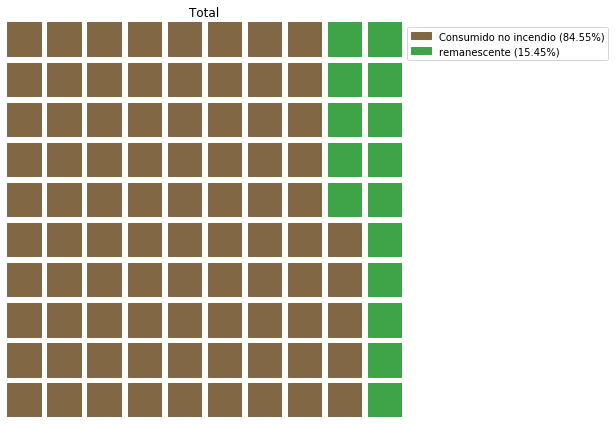

In [11]:
# Figura padrão
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=10, 
    values=[84.556, 100-84.556],
    colors=("#826745", "#3EA447"),
    title={'label': 'Total', 'loc': 'center'},
    labels=["{0} ({1}%)".format(k, v) for k, v in (('Consumido no incendio','84.55'),('remanescente' ,'{}'.format(round(100-84.55,2))))],
#     labels=["{0}".format(k) for k in ['consumido no incendio', 'remanescente']],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=18,
    icon_legend=True,
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)
plt.show()

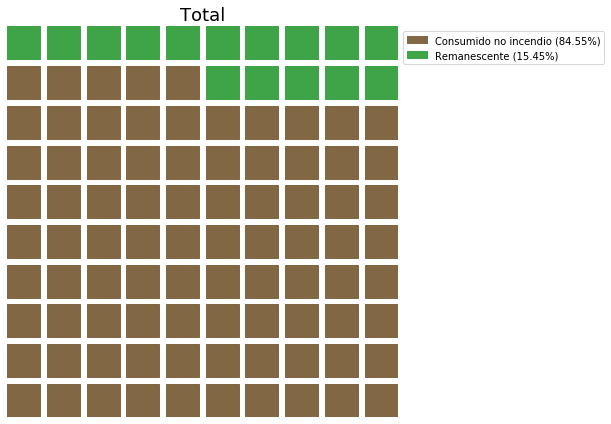

<Figure size 432x288 with 0 Axes>

In [44]:
# Figura padrão
fig2 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=10, 
    values=[84.556, 100-84.556],
    colors=("#826745", "#3EA447"),
    title={'label': 'Total', 'loc': 'center', 'fontsize':18},
    labels=["{0} ({1}%)".format(k, v) for k, v in (('Consumido no incendio','84.55'),('Remanescente' ,'{}'.format(round(100-84.55,2))))],
#     labels=["{0}".format(k) for k in ['consumido no incendio', 'remanescente']],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=18,
    icon_legend=True,
    vertical=True,
#     icons=['fire','heart'],  # fire, campfire, heart, heart-o - OBS: pode passar a ideia errada
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)
plt.show()

plt.savefig('total.svg')
plt.savefig('total.png')

### criando dicionários para plot
cada linha deve ser um departamento, e cada coluna uma coleção

In [13]:
dc.head()

,dept,colecao,numero_exemp,incendio,incendio_perc_total,incendio_perc_colecao
0,DA,Arqueológica,510674,153202,0.765019,29.999961
1,DA,Arqueobotânica,528187,528187,2.637520,100.000000
2,DA,Antropologia Biológica,3000,3000,0.014981,100.000000
3,DA,Setor de Etnográficas,41495,41495,0.207207,100.000000
4,DA,Doc. de Línguas Indígenas,16093,16093,0.080361,100.000000


In [14]:
# lista de departamentos ordenada de acordo com o número de coleções
deptos = dc['dept'].value_counts().sort_values(ascending=True).index

In [21]:
deptos

Index(['DB', 'DV', 'DA', 'Direção', 'DI', 'DE', 'DGP'], dtype='object')

In [26]:
# for para dept
# for para colecao
# dict padrao
d = defaultdict()

index=0
adj = 0  # valor para ajuste das linhas (número de colunas para pular se acabar as coleções por depto)
for dept in deptos:
    temp = dc[dc['dept']==dept]
    
    row_count = temp.shape[0] # aumenta a linha com o número de dept
    
    adj = 10
    for c in range(temp['colecao'].shape[0]):
        
        adj -= 1
        index += 1
        val = round(temp.iloc[c-1].loc['incendio_perc_colecao'], 2)
        colecao = temp.iloc[c-1].loc['colecao']
        
        # criando dicionário para o gráfico
        d[(7,10,index)]= { 
                    'values':[val, 100-val],
                    'colors':("#826745", "#3EA447"),
                    'title':{'label': f'Depto.: {dept}\nCol.: {colecao}', 'loc': 'left', 'fontsize':14},
#                   'labels':["{0} ({1}%)".format(k, v) for k, v in data.items()],
#                   'labels':["{0}".format(k) for k in ['% da colecao consumida no incendio', '% remanescente da coleção']],
#                   'legend':{'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
#                     'icon_size':18, 
                    'icon_legend':True,
        }
    
        
        # pulando para a próxima linha
        if c == temp['colecao'].shape[0]-1:
            index = index + adj
        
d = dict(d)
# d

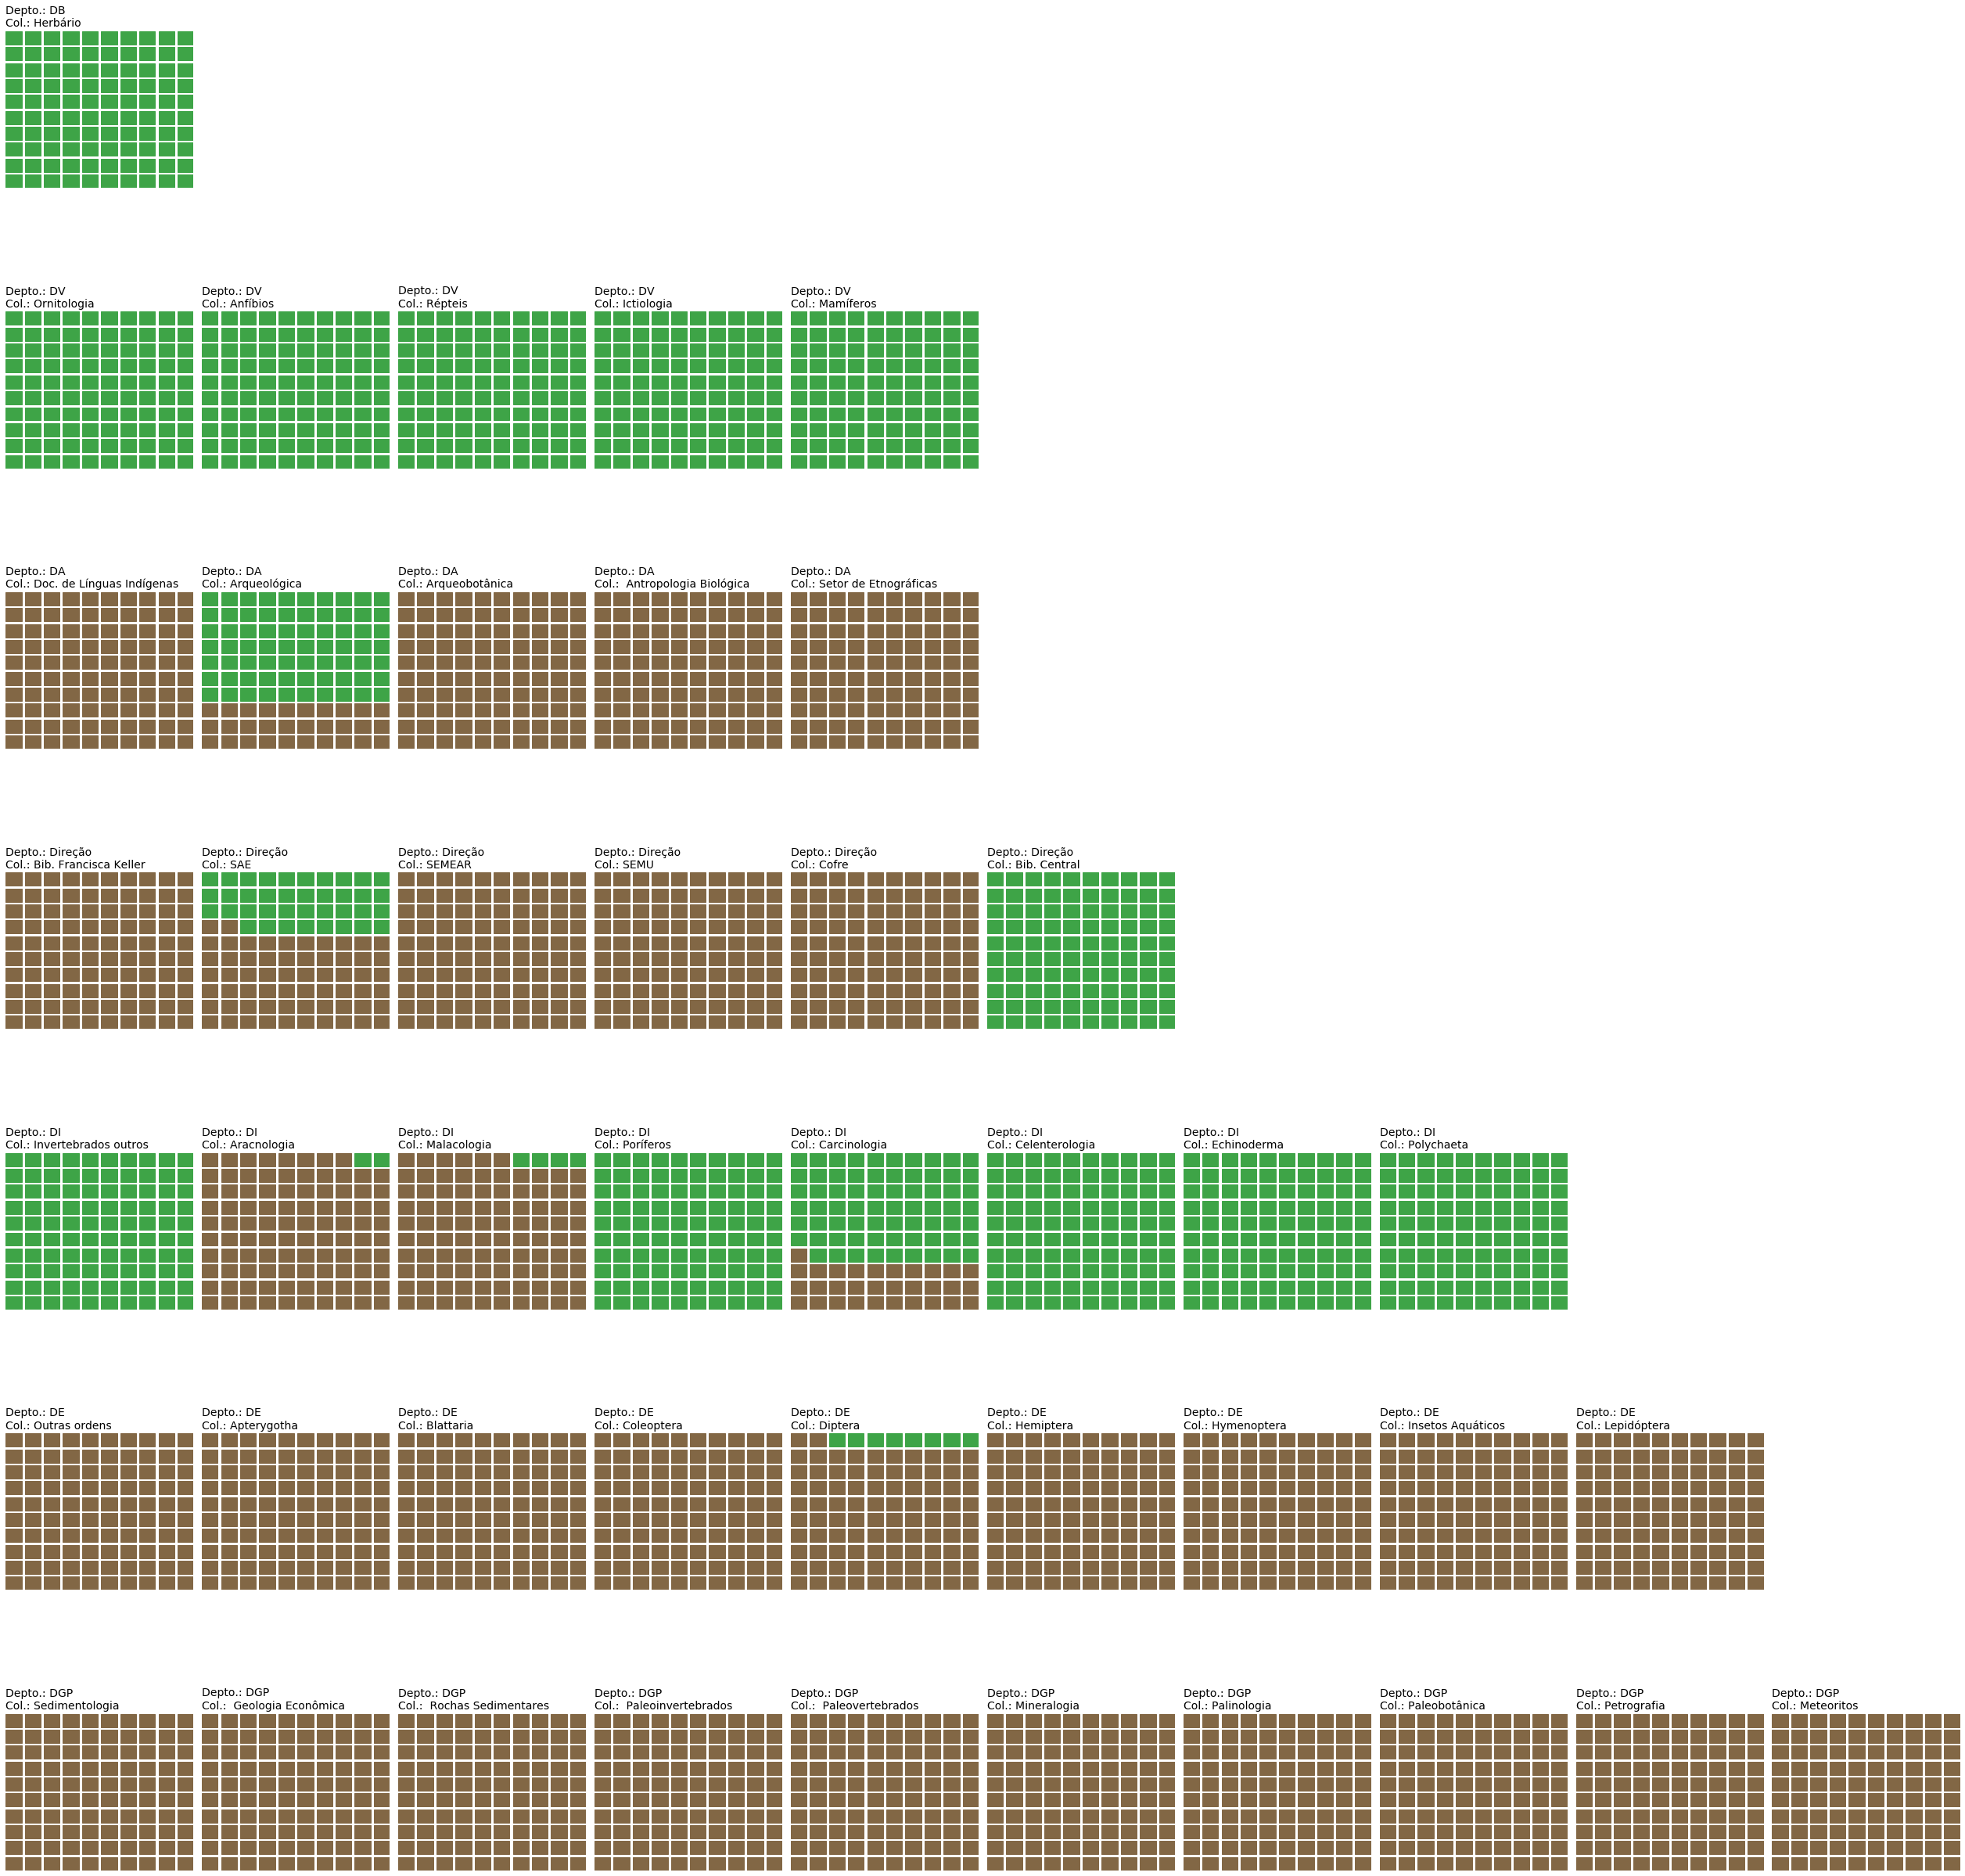

In [30]:
teste = plt.figure(
    FigureClass= Waffle,
    plots= d,
    rows=10, 
    columns=10, 
    vertical=True, 
    block_aspect_ratio=1.2,
    figsize=(35, 35)  # figsize is a parameter of matplotlib.pyplot.figure
)

plt.savefig('teste_colecao.svg')
plt.savefig('teste_colecao.png')

**<font color='red' size='5'>Ajustes</font>**

- idealmente, o nome do departamento deveria ficar nas colunas (editar o svg)
- adicionar legenda